In [67]:
import numpy as np
import  pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler,Normalizer,LabelEncoder
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree


# Data Preprocessing

In [6]:
df = pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.head ()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(150, 6)

In [15]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
l = LabelEncoder()
df["Species"] = l.fit_transform(df["Species"])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


# Outlier Deterction

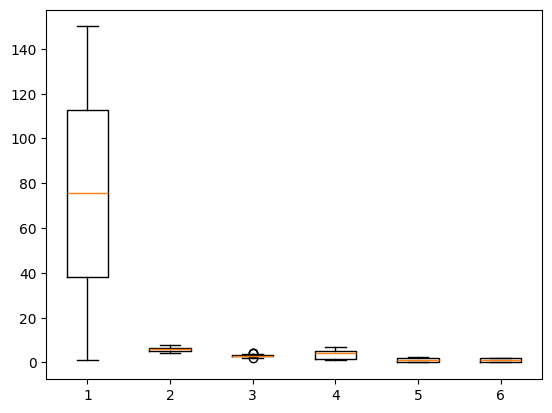

In [20]:
plt.boxplot(df)
plt.show()

In [23]:
x = df[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Data Standerdization

In [24]:
s = StandardScaler()
s1 = s.fit_transform(x)
s1

array([[-1.72054204e+00, -9.00681170e-01,  1.03205722e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.69744751e+00, -1.14301691e+00, -1.24957601e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.67435299e+00, -1.38535265e+00,  3.37848329e-01,
        -1.39813811e+00, -1.31297673e+00],
       [-1.65125846e+00, -1.50652052e+00,  1.06445364e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.62816394e+00, -1.02184904e+00,  1.26346019e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.60506942e+00, -5.37177559e-01,  1.95766909e+00,
        -1.17067529e+00, -1.05003079e+00],
       [-1.58197489e+00, -1.50652052e+00,  8.00654259e-01,
        -1.34127240e+00, -1.18150376e+00],
       [-1.55888037e+00, -1.02184904e+00,  8.00654259e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.53578584e+00, -1.74885626e+00, -3.56360566e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.51269132e+00, -1.14301691e+00,  1.06445364e-01,
        -1.28440670e+00

In [59]:
df1 = pd.DataFrame(s1,columns=[x])
df1["target"] = y
df1

C:\Users\bhautik\AppData\Local\Temp\ipykernel_26896\3558283956.py:1: DeprecationWarning: DataFrame._data is deprecated and will be removed in a future version. Use public APIs instead.
  df1 = pd.DataFrame(s1,columns=[x])


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...,...
145,1.628164,1.038005,-0.124958,0.819624,1.447956,2
146,1.651258,0.553333,-1.281972,0.705893,0.922064,2
147,1.674353,0.795669,-0.124958,0.819624,1.053537,2
148,1.697448,0.432165,0.800654,0.933356,1.447956,2


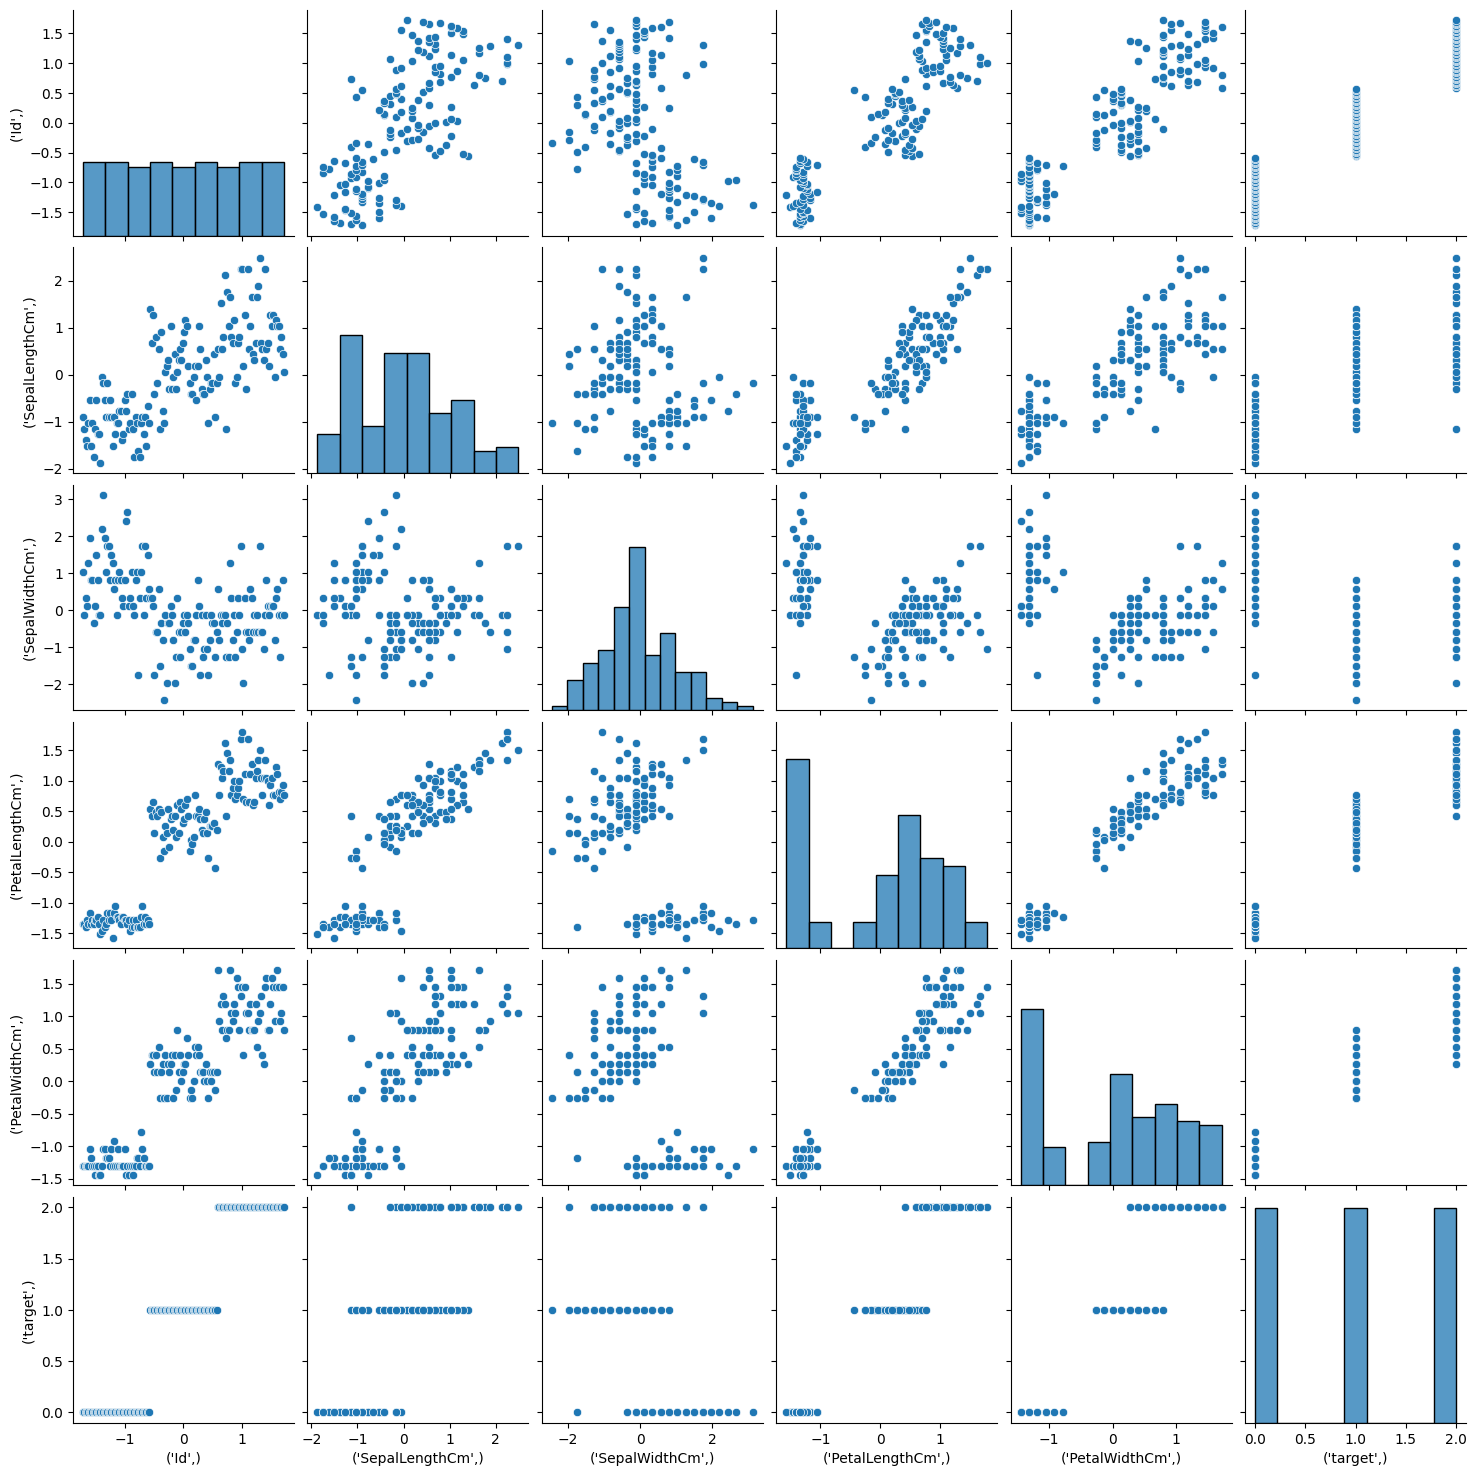

In [60]:
sns.pairplot(df1)

<Axes: >

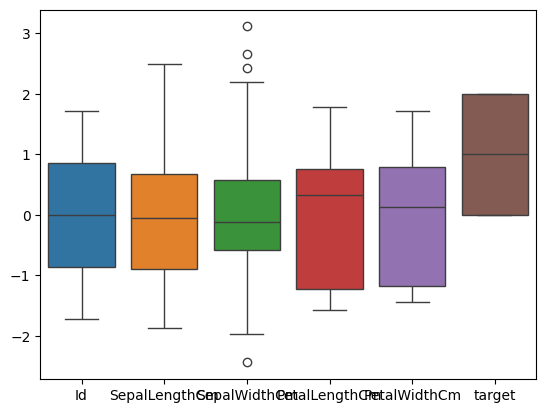

In [61]:
sns.boxplot(df1)

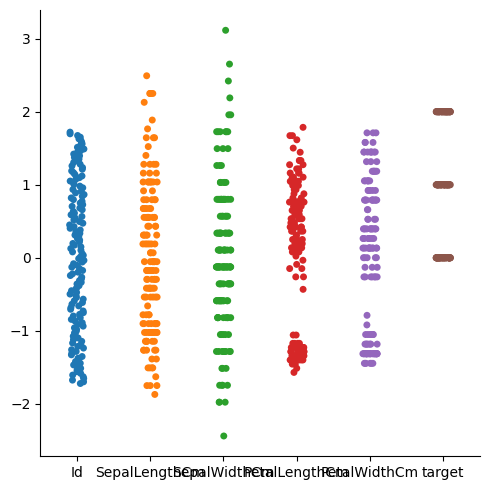

In [62]:
sns.catplot(df1)

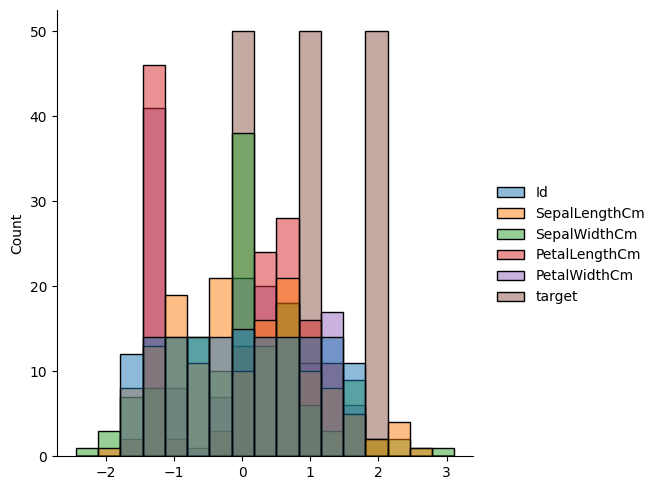

In [63]:
sns.displot(df1)

<Axes: ylabel='Count'>

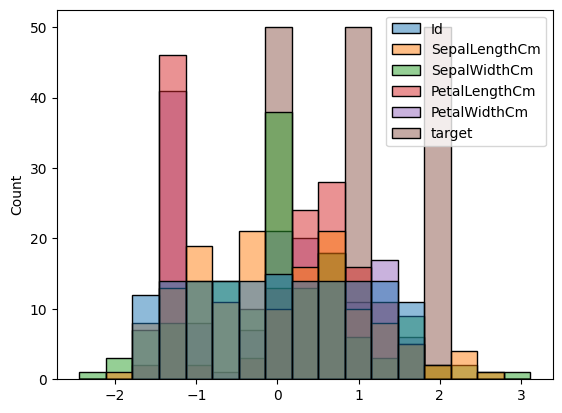

In [64]:
sns.histplot(df1)

# Feature Selection

<Axes: xlabel='None', ylabel='None'>

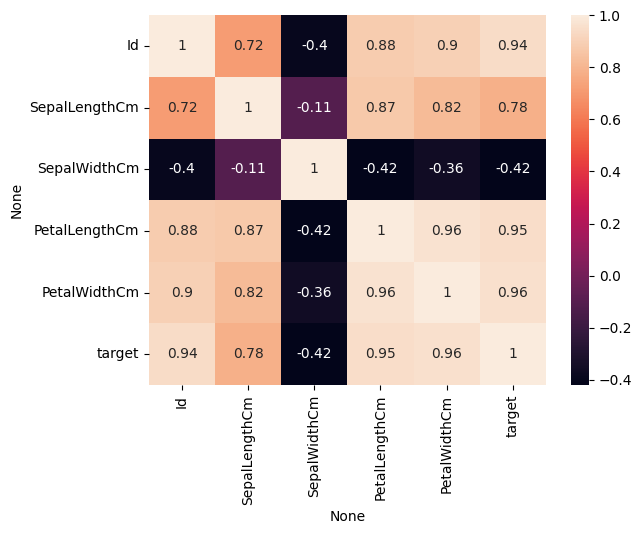

In [30]:
sns.heatmap(df1.corr(),annot=True)

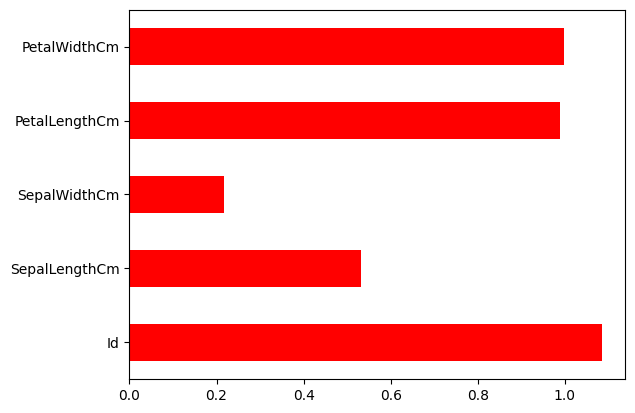

In [32]:
c = mutual_info_classif(x,y)
f = pd.Series(c,df.columns[:len(df.columns)-1])
f.plot(kind = "barh", color = "red")
plt.show()

In [33]:
x1 = df1[["PetalLengthCm","PetalWidthCm"]]
y1 = df1["target"]

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=42)


# model implimantation

# Logistic regression

In [35]:
a = LogisticRegression()

In [36]:
a.fit(x_train,y_train)

C:\Users\bhautik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [37]:
y_pred = a.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred)

1.0

# desecion tree

In [39]:
d = DecisionTreeClassifier()

In [40]:
p = {"criterion" : ["gini", "entropy", "log_loss"],"max_depth": [1,2,3,6,5]
}

In [41]:
g = GridSearchCV(d,p,cv=5)

In [42]:
g.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 6, 5]})

In [43]:
y_pred=g.predict(x_test)

In [44]:
accuracy_score(y_test,y_pred)

0.9555555555555556

In [58]:
print(confusion_matrix(y_test,y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



[Text(0.5, 0.9166666666666666, 'x[1] <= -0.524\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.4090909090909091, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5909090909090909, 0.75, 'x[1] <= 0.725\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.36363636363636365, 0.5833333333333334, 'x[0] <= 0.677\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.18181818181818182, 0.4166666666666667, 'x[1] <= 0.528\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.2727272727272727, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5454545454545454, 0.4166666666666667, 'x[1] <= 0.462\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.45454545454545453, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.6363636363636364, 0.25, 'x[0] <= 0.962\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.5454545454545454, 0.08333333333333333, '

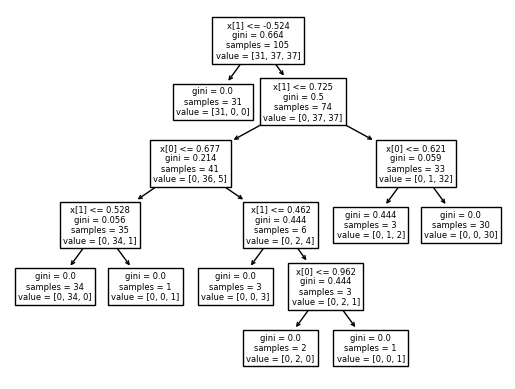

In [68]:
tree.plot_tree(g.best_estimator_)

# naive bayes

In [47]:
db = GaussianNB()
db.fit(x_train,y_train)

C:\Users\bhautik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [48]:
y_pred=db.predict(x_test)

In [49]:
accuracy_score(y_test,y_pred)

1.0

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [55]:
print(confusion_matrix(y_test,y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
